<font color='orange'>**By Mariona Puente Quera</font>**

**Part 1 – NumPy, Matplotlib/Seaborn:**

In [ ]:
# PACKAGES
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

***Q1 (35pts): Convert covariance matrix into correlation matrix using numpy***

A. Briefly explain in 1-2 sentences the concepts of Covariance and Correlation, and describe their relationship. You may use equations for clarification.



<font color='darkblue'>*Both of these concepts are used to study the relationship and dependency between two variables. They study the degree to which two variables similarly deviate from their expected values (mean).</font>*

<font color='darkblue'>*What sets these two concepts apart is simply that the correlation is the standardized covariance. To obtain the correlation of two variables we should divide the covariancce of these variables by the product of the standard deviations of the same values. While **covariance** does not have a limited range of values (both below and above 0), **correlation** ranges always from -1 to +1, being 1 always the correlation between the variable and itself. Though, the covariance of one variable and itself (the so called **variance**) does not always have the same value, but instead it measures how different are the values of one variable to one another.</font>*

<font color='darkblue'>*Positive values show directly proportional relationships both in covariance and correlation and negative values show inversely proportional dependencies.</font>*

<font color='darkblue'>*To clarify this explanation here are the equations of these two terms:</font>*

<font color='darkblue'> COVARIANCE EQUATION:

<font color='darkblue'>$$\text{Cov}(X, Y) = \frac{\sum_{i=1}^{n}(X_i - \bar{X})(Y_i - \bar{Y})}{n}$$</font>

<font color='darkblue'> CORRELATION EQUATION:

<font color='darkblue'>$$\text{Corr}(X, Y) = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y}$$</font>

B. Load the Iris dataset, using any method of your choice (e.g.: pd.read_csv "iris.csv") in Pandas). Use visualization to explore the relationship between the different features.

In [ ]:
df = load_iris()
df = pd.DataFrame(df.data, columns=df.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<font color='darkblue'>*The dataset contains 4 columns with the information of the length and width in centimeters of both the sepal and petal of flowers.</font>*

In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<font color='darkblue'>*Here we can have a better understanding of the dimensions and the range of values that our dataset has.</font>*

In [ ]:
df.isna().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0


<font color='darkblue'>*We make sure that there are no missing values in our dataset, even though we could expect it because the four columns have the same number of counts.</font>*

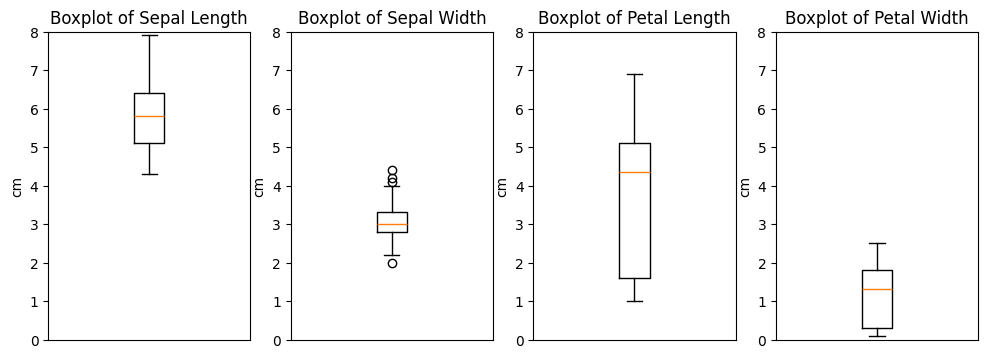

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.boxplot(df['sepal length (cm)'])
plt.title('Boxplot of Sepal Length')
plt.ylabel('cm')
plt.ylim(0, 8)
plt.xticks([])
plt.subplot(1, 4, 2)
plt.boxplot(df['sepal width (cm)'])
plt.title('Boxplot of Sepal Width')
plt.ylabel('cm')
plt.ylim(0, 8)
plt.xticks([])
plt.subplot(1, 4, 3)
plt.boxplot(df['petal length (cm)'])
plt.title('Boxplot of Petal Length')
plt.ylabel('cm')
plt.ylim(0, 8)
plt.xticks([])
plt.subplot(1, 4, 4)
plt.boxplot(df['petal width (cm)'])
plt.title('Boxplot of Petal Width')
plt.ylabel('cm')
plt.ylim(0, 8)
plt.xticks([])
plt.show()

<font color='darkblue'>*We can see how the dimensions of the sepals are on average bigger than the petals, even though the petal length presents a wider range of values.</font>*

<font color='darkblue'>*We can see there could be some outliers in our data, so we are going to analyse them:*</font>

In [ ]:
for col in df.columns:
  outliers = df[(df[col] < np.mean(df[col]) - 2 * np.std(df[col])) |
              (df[col] > np.mean(df[col]) + 2 * np.std(df[col]))]
  print(f'The column: {col} contains the following outliers:\n{outliers[col]}\n-----------------------------------')

The column: sepal length (cm) contains the following outliers:
105    7.6
117    7.7
118    7.7
122    7.7
131    7.9
135    7.7
Name: sepal length (cm), dtype: float64
-----------------------------------
The column: sepal width (cm) contains the following outliers:
14    4.0
15    4.4
32    4.1
33    4.2
60    2.0
Name: sepal width (cm), dtype: float64
-----------------------------------
The column: petal length (cm) contains the following outliers:
Series([], Name: petal length (cm), dtype: float64)
-----------------------------------
The column: petal width (cm) contains the following outliers:
Series([], Name: petal width (cm), dtype: float64)
-----------------------------------


<font color='darkblue'>*We confirm that the variable sepal length contains 6 values outside the range of - and + 2 standard deviations (all of them on the above the upper border), and that the variable sepal width contains 5 of them also above the upper border.</font>*

<font color='darkblue'>*The results don't have to be the same as we see on the boxplot due to the fact that the boxplot limits depend on the interquartile range, and we defined outliers as values outside - and + 2 standard deviations.</font>*

<font color='darkblue'>*We will keep these outliers as there is no instruction to do otherwise.*</font>

C. Implement the following functions:

a. A function to calculate the covariance between two variables:

In [ ]:
def calcCov(x, y):
  if len(x) != len(y):
   raise ValueError("x and y must have the same length")
  covariance = sum((xi - np.mean(x)) * (yi - np.mean(y)) for xi, yi in zip(x, y)) / (len(x) - 1)
  return covariance

b. A function to compute the Covariance matrix:

covMat(data) should return an n by n covariance matrix, where n is the
number of features (in case of the iris dataset n=4)

In [ ]:
def covMat(data):
  cov_matrix = np.zeros((data.shape[1], data.shape[1]))
  for i in range(data.shape[1]):
    for j in range(data.shape[1]):
      cov_matrix[i, j] = calcCov(data.iloc[:, i], data.iloc[:, j])
  return cov_matrix

D. Test1: compare the results of your function with NumPy's np.cov(data, rowvar=False) using the iris dataset.

In [ ]:
print(covMat(df))
print(np.cov(df, rowvar=False))

[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]
[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]


In [ ]:
np.allclose(covMat(df), np.cov(df, rowvar=False))

True

<font color='darkblue'>*We check if they are really the same and we can confirm it.</font>*

E. Using your covariance function, implement a function to calculate the correlation matrix:

In [ ]:
def corrMat(data):
  std_dev = np.sqrt(np.diag(covMat(data)))
  corr_matrix = covMat(data) / np.outer(std_dev, std_dev)
  return corr_matrix

F. Test2: validate your correlation matrix implementation by comparing it with the results of NumPy's np.corrcoef(data,rowvar=False), using the iris dataset.

In [ ]:
print(corrMat(df))
print(np.corrcoef(df, rowvar=False))

[[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]
[[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]


In [ ]:
np.allclose(corrMat(df), np.corrcoef(df, rowvar=False))

True

<font color='darkblue'>*We check if they are really the same and we can confirm it.</font>*






G. Use visualizations to communicate the tests results. Include appropriate titles,
axis labels, and colorbars where relevant.

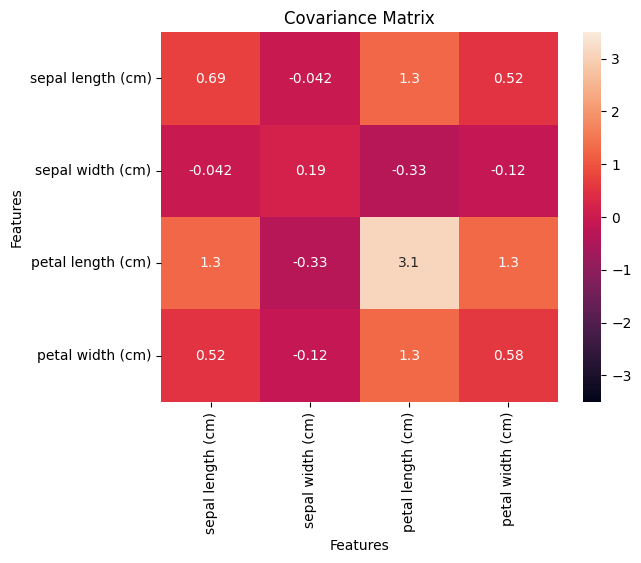

In [ ]:
covariance_matrix = covMat(df)
sns.heatmap(covariance_matrix, annot=True, vmin=-3.5, vmax=3.5, xticklabels=df.columns, yticklabels=df.columns)
plt.title('Covariance Matrix')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

<font color='darkblue'>*This matrix shows the covariance between each variable. The values of the legend range from -3.5 until +3.5 because I wanted the heatmap to show how the negative values don't reach very high absolute values (the smallest value we have is -0.33). Instead the positive covariance reaches 0.52. The values on the diagonal that show the variance between each variable and itself show obviously the highest values, reaching 3.1 in the 3rd feature: petal length.</font>*

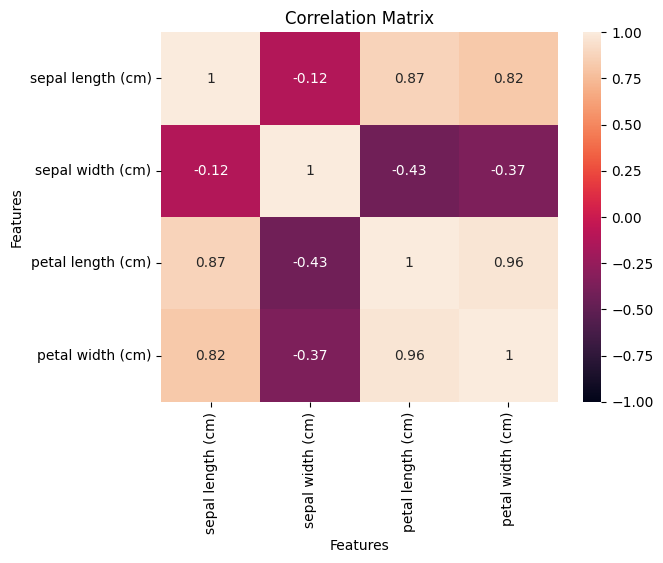

In [ ]:
correlation_matrix = corrMat(df)
sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1, xticklabels=df.columns, yticklabels=df.columns)
plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

<font color='darkblue'>*This matrix shows the correlation between each variable. The values of the legend range from -1 until +1 because this is the maximum range that the correlation values can take. Like we have seen in the covariance matrix, the heatmap helps us see how the positive values have a greater absolute value. The lowest value is-0.43, whereas the greatest value is 0.96 (excluding the diagonal). The diagonal has always a value of 1 because it's the correlation of the variable to itself.</font>*

**Part 2 – NumPy, Pandas, MatPlotLib/Seaborn/Plotly:** The purpose of this part is to practice using libraries that were introduced in lecture. These libraries include pandas, numpy and matplotlib/seaborn. Please use the git commands that you were taught while completing this project and
upload this project to your github account. When submitting the assignment, please include the code file as well as the URL to your git account to show us you understand navigating projects using git.

***Q2 (50pts):*** *For this question you will use the dataset titled “laptop-price – dataset.csv”. Import the libraries mentioned above and import the dataset from your filesystem into the code.*

In [ ]:
# PACKAGES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as plot

In [ ]:
df = pd.read_csv('laptop_price - dataset.csv')
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


<font color='darkblue'>*We can see that our dataset has 15 variables related to information about a certain computer models.</font>*

In [ ]:
df.describe()

,Inches,CPU_Frequency (GHz),RAM (GB),Weight (kg),Price (Euro)
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,2.302980,8.440784,2.040525,1134.969059
std,1.429470,0.503846,5.097809,0.669196,700.752504
min,10.100000,0.900000,2.000000,0.690000,174.000000
25%,14.000000,2.000000,4.000000,1.500000,609.000000
50%,15.600000,2.500000,8.000000,2.040000,989.000000
75%,15.600000,2.700000,8.000000,2.310000,1496.500000
max,18.400000,3.600000,64.000000,4.700000,6099.000000


<font color='darkblue'>*Here we can have a better understanding of the dimensions and the range of values that our dataset has.</font>*

*Please write code to complete the following tasks with this dataset:*

A. Plot the price of all the laptops.

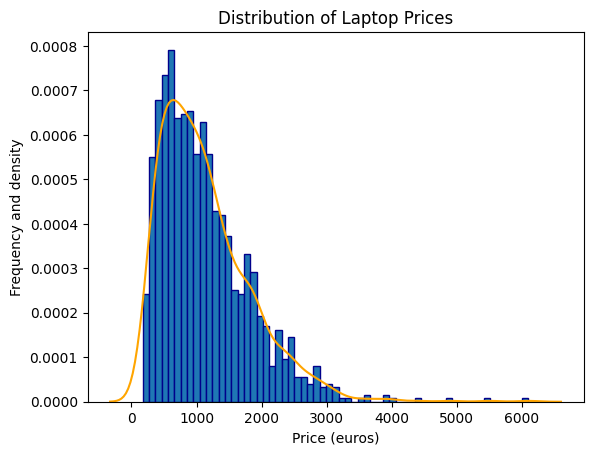

In [ ]:
plt.hist(df['Price (Euro)'], bins=61, edgecolor='darkblue', linewidth=1, density=True)
sns.kdeplot(df['Price (Euro)'], color='orange')
plt.title('Distribution of Laptop Prices')
plt.xlabel('Price (euros)')
plt.ylabel('Frequency and density')
plt.show()

<font color='darkblue'>*The variable price has a negative asymetric distribution.</font>*

B. Which company has on average the most expensive laptop? What is the average laptop price for each company?

In [ ]:
average_prices = df.groupby('Company')['Price (Euro)'].mean().sort_values(ascending=False)
average_prices

,Price (Euro)
Company,
Razer,3346.142857
LG,2099.000000
MSI,1728.908148
Google,1677.666667
Microsoft,1612.308333
Apple,1564.198571
Huawei,1424.000000
Samsung,1413.444444
Toshiba,1267.812500


<font color='darkblue'>*Here we can observe how the company that has on average the most expensive laptop is Razer, with an average price of aproximately 3346€. In this table we can explore the different average prices that the other companies have, ordered from the most expensive until the cheapest. In this way we can see that the second most expensive company is LG with an average price of 2099€, and the cheapest one is Vero with an average price of aproximately 217€.</font>*

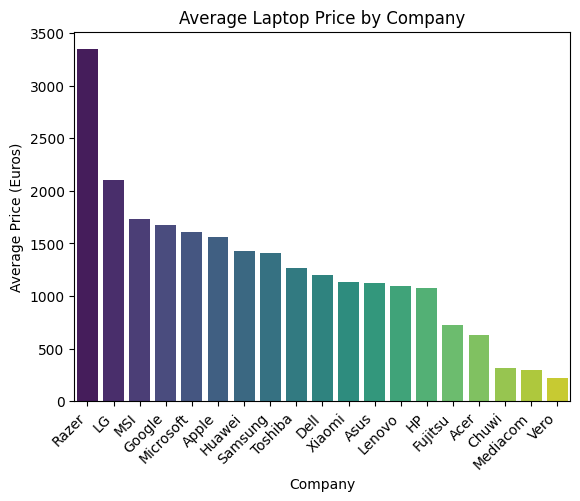

In [ ]:
sns.barplot(x=average_prices.index, y=average_prices.values, hue=average_prices.index, palette="viridis")
plt.title('Average Laptop Price by Company')
plt.xlabel('Company')
plt.ylabel('Average Price (Euros)')
plt.xticks(rotation=45, ha='right')
plt.show()

<font color='darkblue'>*In this plot we can better visualise and interpret the results we got in the previous table, to understand better the distribution of this average price across companies. Razer really stands out from the companies that follow it, and the 3 to 5 last companies also change the steepness of the distribution.</font>*

C. Find the different types of Operating systems present in the data - under the column name "OpSys".
Please note - there are operating systems that are the same systems and just written differently in the column - please fix them to be uniform.

In [ ]:
print(df['OpSys'].unique())

['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']


<font color='darkblue'>*The different types of operating systems present in the data are: Mac OS, Windows 10, Linux, Android, Chrome OS, Windows 7. We also have some laptops without operating system 'No OS'. Instead we got 9 unique values in this column. So, we are going to merge 'macOS' with 'Mac OS X' and 'Windows 10' with 'Windows 10S'. </font>*

In [ ]:
df['OpSys'] = df['OpSys'].replace({
    'macOS': 'Mac OS',
    'Mac OS X': 'Mac OS',
    'Windows 10 S': 'Windows 10'})
print(df['OpSys'].unique())

['Mac OS' 'No OS' 'Windows 10' 'Linux' 'Android' 'Chrome OS' 'Windows 7']


<font color='darkblue'>*Now it is corrected.</font>*

D. Plot for each of the operating system types the distribution of the prices, so that the number of plots equals to the number of unique operating systems.

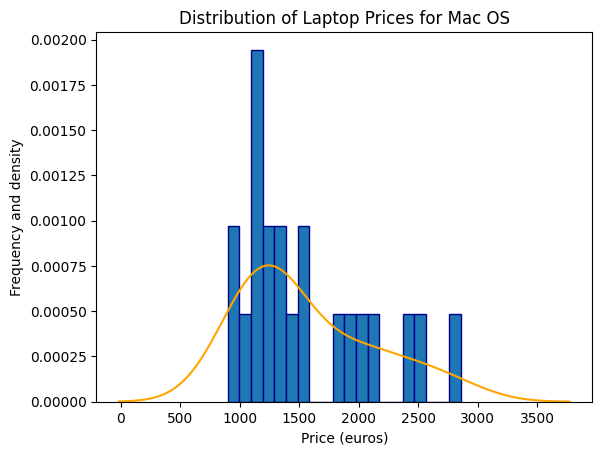

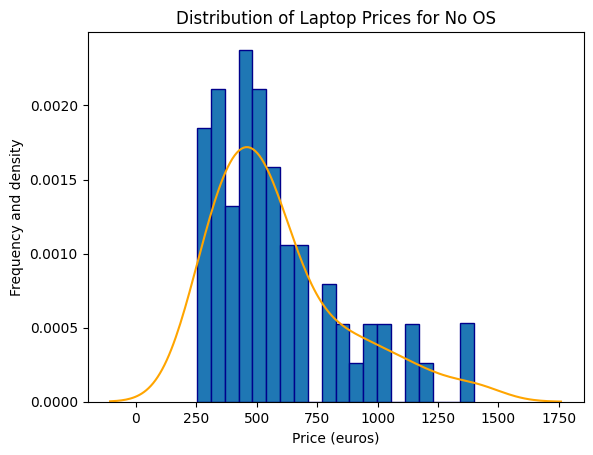

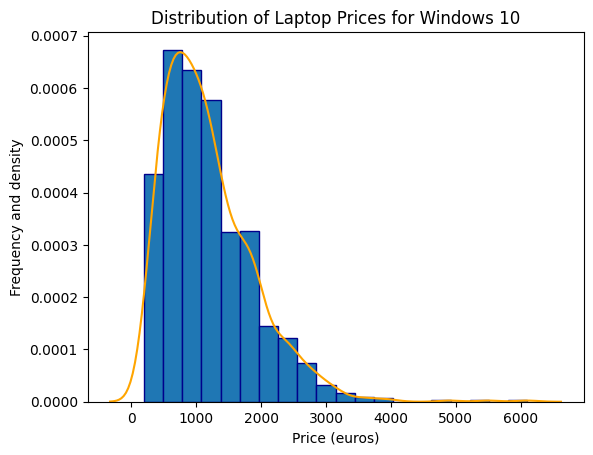

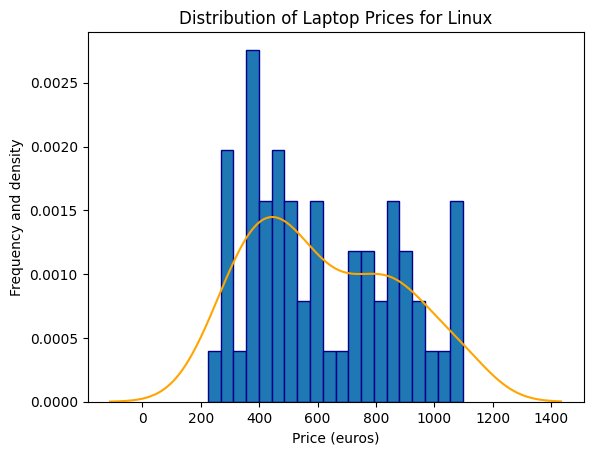

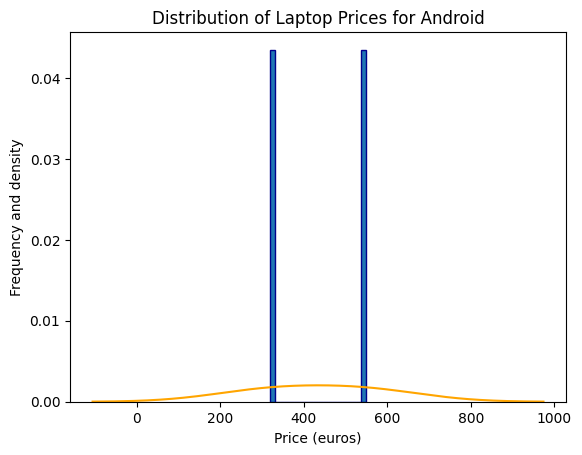

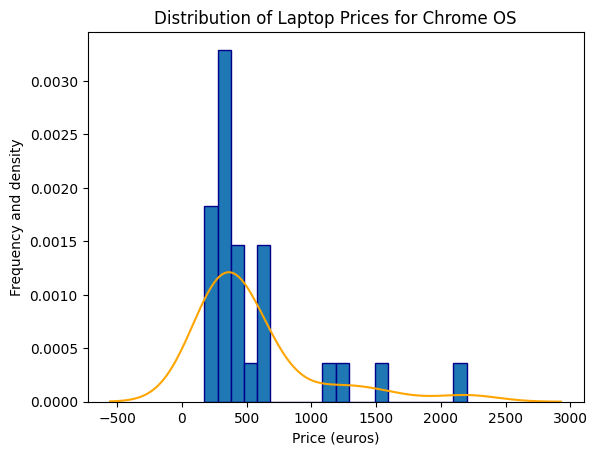

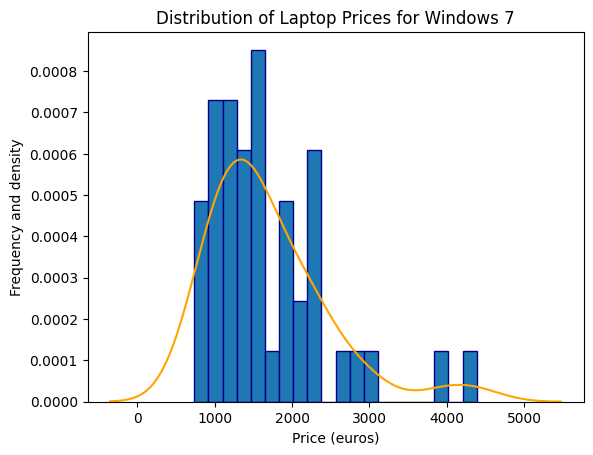

In [ ]:
for operating_systems in df['OpSys'].unique():
    plt.hist(df[df['OpSys'] == operating_systems]['Price (Euro)'], bins=20, edgecolor='darkblue', linewidth=1, density=True)
    sns.kdeplot(df[df['OpSys'] == operating_systems]['Price (Euro)'], color='orange')
    plt.title(f'Distribution of Laptop Prices for {operating_systems}')
    plt.xlabel('Price (euros)')
    plt.ylabel('Frequency and density')
    plt.show()

<font color='darkblue'>*In these 7 plots we can observe the distributions of the prices by each of the possible operating systems we have. All of them show a negative asymetric distribution, except Linux that gets 2 peaks and 'Android'which has a symetric distribution but looks like it does not have enough values.</font>*

E. What is the relationship between RAM and computer price? Add an adequate plot to support your findings.

In [ ]:
correlation_RAM_price = df['RAM (GB)'].corr(df['Price (Euro)'])
correlation_RAM_price

0.7402865271622695

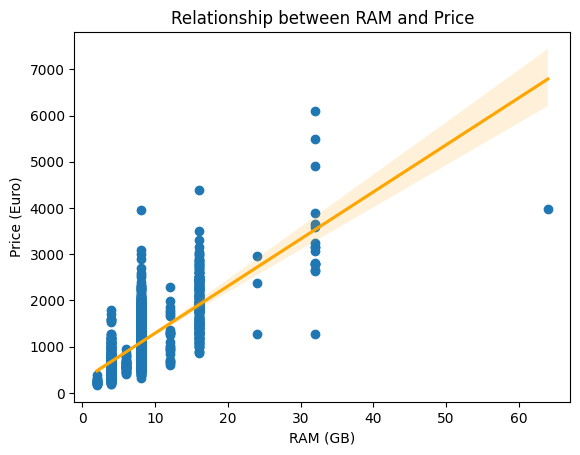

In [ ]:
plt.scatter(df['RAM (GB)'], df['Price (Euro)'])
sns.regplot(x='RAM (GB)', y='Price (Euro)', data=df, scatter=False, color='orange')
plt.title('Relationship between RAM and Price')
plt.xlabel('RAM (GB)')
plt.ylabel('Price (Euro)')
plt.show()

<font color='darkblue'>*Here we can visualise the correlation between the variable RAM and price, which has a hich value (aproximately 0.74), and we can observe that lower values of RAM are more represented, having only one case that is higher than 35. This is why the confidence interval gets bigger as values increase. Though, we can see really well how the values correlate as the values keep slowly increasing. We can conclude that the have a strong directly proportional dependency.</font>*

F. Create a new column for the dataframe called "Storage type" that extracts the
storage type from the column "Memory".

For example, in the first row in the column "Memory" it states "128GB SSD",
the new column will have just "SSD" in its first row.

In [ ]:
print(df['Memory'].unique())

['128GB SSD' '128GB Flash Storage' '256GB SSD' '512GB SSD' '500GB HDD'
 '256GB Flash Storage' '1TB HDD' '32GB Flash Storage'
 '128GB SSD +  1TB HDD' '256GB SSD +  256GB SSD' '64GB Flash Storage'
 '256GB SSD +  1TB HDD' '256GB SSD +  2TB HDD' '32GB SSD' '2TB HDD'
 '64GB SSD' '1.0TB Hybrid' '512GB SSD +  1TB HDD' '1TB SSD'
 '256GB SSD +  500GB HDD' '128GB SSD +  2TB HDD' '512GB SSD +  512GB SSD'
 '16GB SSD' '16GB Flash Storage' '512GB SSD +  256GB SSD'
 '512GB SSD +  2TB HDD' '64GB Flash Storage +  1TB HDD' '180GB SSD'
 '1TB HDD +  1TB HDD' '32GB HDD' '1TB SSD +  1TB HDD'
 '512GB Flash Storage' '128GB HDD' '240GB SSD' '8GB SSD' '508GB Hybrid'
 '1.0TB HDD' '512GB SSD +  1.0TB Hybrid' '256GB SSD +  1.0TB Hybrid']


<font color='darkblue'>*We fist print the unique values of the variable Memory to make sure we know all the storage types in out dataset. They are: SSD, Flash Storage, HDD and Hybrid.</font>*

In [ ]:
df['Storage type'] = df['Memory'].str.extract(r'(\bSSD\b|\bFlash Storage\b|\bHDD\b|\bHybrid\b)')
print(df.head())

  Company      Product   TypeName  Inches                    ScreenResolution  \
0   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Macbook Air  Ultrabook    13.3                            1440x900   
2      HP       250 G6   Notebook    15.6                   Full HD 1920x1080   
3   Apple  MacBook Pro  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

  CPU_Company       CPU_Type  CPU_Frequency (GHz)  RAM (GB)  \
0       Intel        Core i5                  2.3         8   
1       Intel        Core i5                  1.8         8   
2       Intel  Core i5 7200U                  2.5         8   
3       Intel        Core i7                  2.7        16   
4       Intel        Core i5                  3.1         8   

                Memory GPU_Company                GPU_Type   OpSys  \
0            128GB SSD       Intel  Iris Plus Graphics 640  Mac 

In [ ]:
print(df['Storage type'].unique())
print(df.isnull().values.any())

['SSD' 'Flash Storage' 'HDD' 'Hybrid']
False


<font color='darkblue'>*We make sure that the unique values are the ones we wanted and we check that there are no missing values, just in case.</font>*

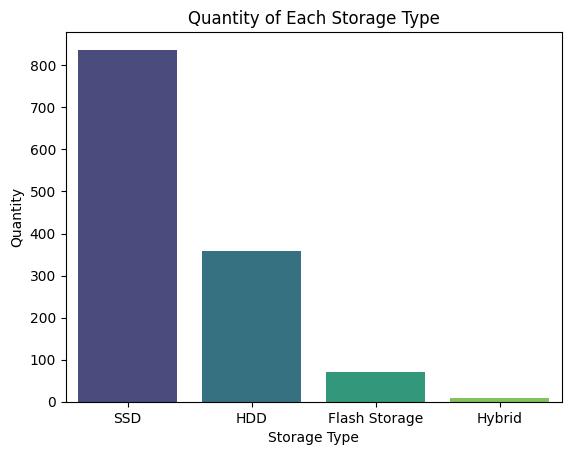

In [ ]:
storage_counts = df['Storage type'].value_counts()
sns.barplot(x=storage_counts.index, y=storage_counts.values, hue=storage_counts.index, palette="viridis")
plt.title('Quantity of Each Storage Type')
plt.xlabel('Storage Type')
plt.ylabel('Quantity')
plt.show()

<font color='darkblue'>*To explore better this new variable we used this plot to see the distribution and we can see how most of the laptops use SDD, and how Hybrid type has practically no representation. HDD is also common but has less than half the values that SDD has, and Flash Storage is used by less than 100 of the laptops.</font>*

All plots must be plotted with axes titles and units as well as plot titles.

Q3 (15pts): Think of additional questions related to this data. What types of analyses and
visualizations would you use to address them? Select two questions from your list and
implement. Submit your list of questions, suggested analyses and visualizations and the
implementation.

<font color='darkblue'>*Here are some questions related to this data that could be addressed:*

*1. Which variables are related to one another and in which way and intensity? ---> HOW COULD IT BE ADDRESSED: Calculate correlations between each pair of variables and visualise them with a scatter plot like we did between RAM and computer price in exercise E). It is important to take into account that Pearson's correlation (or Spearman, if our distribution is not normal) can be used only for numeric variables, thus to compute correlations between categorical variables we could use Chi square test to check if there is a significant association between them and, if there is, Cramer's V would help us learn the intensity of it. In that case, a contingency table would help us visualise the results. The last case we would encounter in the dataset would be computing the correlation between one variable that is numerical and another one that is categorical, I would suggest to use Point-Biserial correlation if our categorical variable is dicotomic (only two values) and ANOVA if that variable has three or more possible values (or its non-parametric equivalent for non-normal distributions: Kruskal-Wallis). A boxplot or violin plot would probably be a simple and efficient way of visualising these results.</font>*

<font color='darkblue'>*This question is indeed very broad and it could answer a very big range of specific questions that we could be interested in knowing their answers when, for example, trying to find the best computer model to buy according to our preferences. Questions like: 'What factors most strongly influence the price of a product?', 'Which products have the most competitive price for a certain RAM value?', 'Are there noticeable differences in prices between different companies?', 'Does the type of CPU or GPU have an impact on the price?', 'Which operating systems are more commonly associated with high-priced products?', etc. These questions could be answered using the methods described above.*

*2. Are all this variables necessary to describe the information that this dataset holds? ---> HOW COULD IT BE ADDRESSED: Perform dimensionality reduction with Principal Component Analysis (PCA) and check how good does it fit. It should be accompained with plots like the Explained Variance Plot or Principal Component Score Plot, which are normally used to show PCA results.</font>*

<font color='darkblue'>*3. Imagine I am a new company that wants to enter the computer market, or even one of the companies present on our dataset that wants to release a new model. I would be interested in knowing which would be a competitive price for my model so that I make the best possible business. ---> HOW COULD IT BE ADDRESSED: I could simply try to fit, for example, a General Linear Model (GLM) with the dataset we have and try to predict the variable price. Therefore, if a good fit is accomplished, I could try to predict the price that my computer model with all its attributes (inches, resolution, CPU, GPU, memory, OS, etc.) would have in this market and take this value as an indicator of around which price my computer should be.*

<font color='darkblue'>*The questions that will be implemented are the second and the third:*

***- Dimensionality reduction with PCA.</font>***

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf

<font color='darkblue'>*PCA can only be performed on numerical variables, but as not many of them in our dataset are, we are going to explore which of the categorical variables have not so many unique values and could be transformed to dummies without making our dataset too big.*

In [ ]:
for col in df.columns:
  print(f"'{col}':  {len(df[col].unique())}")

'Company':  19
'Product':  618
'TypeName':  6
'Inches':  18
'ScreenResolution':  40
'CPU_Company':  3
'CPU_Type':  93
'CPU_Frequency (GHz)':  25
'RAM (GB)':  9
'Memory':  39
'GPU_Company':  4
'GPU_Type':  106
'OpSys':  7
'Weight (kg)':  171
'Price (Euro)':  791
'Storage type':  4


In [ ]:
for col in df.columns:
  if len(df[col].unique()) < 10:
    print(f"'{col}':  {len(df[col].unique())}")

'TypeName':  6
'CPU_Company':  3
'RAM (GB)':  9
'GPU_Company':  4
'OpSys':  7
'Storage type':  4


<font color='darkblue'>*We decide to keep the categorical variables that have less than 10 unique values.*

*After, we get the dummies (one hot encoding) dropping the first variable (that corresponds to the first unique value) to avoid redundancy and to avoid obtaining a PCA biased by multicollinearity. We then keep only the numerical values while transforming the one hot True/False encoding into 1 and 0:</font>*

In [ ]:
columns_dummies = ['TypeName', 'CPU_Company', 'RAM (GB)', 'GPU_Company', 'OpSys', 'Storage type']
df_dummies = pd.get_dummies(df, columns=columns_dummies, drop_first=True)
df_numeric = df_dummies.select_dtypes(include=['number', 'bool']).copy()
df_numeric = df_numeric.astype(int)
df_numeric.head()

,Inches,CPU_Frequency (GHz),Weight (kg),Price (Euro),TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,CPU_Company_Intel,...,GPU_Company_Nvidia,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 7,Storage type_HDD,Storage type_Hybrid,Storage type_SSD
0,13,2,1,1339,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1
1,13,1,1,898,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
2,15,2,1,575,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
3,15,2,1,2537,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1
4,13,3,1,1803,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1


<font color='darkblue'>*We proceed to perform the PCA analysis and we will test different number of components to keep. Our current dataset has 31 columns so we are going to retain a maximum of 10 components (and a minimum of 2). For each we compute the amount of vairance that they explain and the cumulative explained variance (the sum of each component and all the previous ones).</font>*

In [ ]:
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df_numeric)

for i in [2, 3, 4, 5, 6, 7, 8, 9, 10]:
  pca = PCA(i)
  pca_components = pca.fit_transform(standardized_data)
  explained_variance = pca.explained_variance_ratio_
  cumulative_explained_variance = explained_variance.cumsum()
  print("Number of components:", i)
  print("Explained variance:", explained_variance)
  print("Cumulative explained variance:", cumulative_explained_variance)

Number of components: 2
Explained variance: [0.14353441 0.11411132]
Cumulative explained variance: [0.14353441 0.25764572]
Number of components: 3
Explained variance: [0.14353441 0.11411132 0.06934431]
Cumulative explained variance: [0.14353441 0.25764572 0.32699003]
Number of components: 4
Explained variance: [0.14353441 0.11411132 0.06934431 0.0603584 ]
Cumulative explained variance: [0.14353441 0.25764572 0.32699003 0.38734844]
Number of components: 5
Explained variance: [0.14353441 0.11411132 0.06934431 0.0603584  0.05521861]
Cumulative explained variance: [0.14353441 0.25764572 0.32699003 0.38734844 0.44256705]
Number of components: 6
Explained variance: [0.14353441 0.11411132 0.06934431 0.0603584  0.05521861 0.04507284]
Cumulative explained variance: [0.14353441 0.25764572 0.32699003 0.38734844 0.44256705 0.48763989]
Number of components: 7
Explained variance: [0.14353441 0.11411132 0.06934431 0.0603584  0.05521861 0.04507284
 0.04184445]
Cumulative explained variance: [0.1435344

<font color='darkblue'>*We can see how the components do not each explain a very big amount of the variance, the first one explains aproximately 14.35% of the variance (it is the one that explains the most amount). This is understandable taking in account that our dataset has 31 variables. Though, if we take 7 principal components we can explain more than 50% of the variance (aproximately 52,95%). And if we take 9 we surpass the 60% threshold (aproximately 60,48% explained variance).*

*The next step will now be to visualise the output of the transformed dataset after applying PCA with the 7 and 9 components. Here we can visualise the data frame and the plot of the cumulative explained variance:</font>*

In [ ]:
pca7 = PCA(7)
pca7_components = pca7.fit_transform(standardized_data)
pca7_df = pd.DataFrame(data=pca7_components)
pca7_df

,0,1,2,3,4,5,6
0,-0.900205,-4.137431,0.209547,-2.726672,1.577911,-1.703111,4.053647
1,-1.996976,-3.589026,0.276674,-2.991540,0.950821,-0.910976,4.306556
2,-1.401386,-0.125545,-0.193346,-2.255143,1.724754,1.052925,0.148575
3,1.299611,-3.184897,0.855712,-2.909096,-0.021763,-3.331565,4.514137
4,-0.314621,-4.054129,0.207190,-2.651576,2.070873,-2.595179,4.083431
...,...,...,...,...,...,...,...
1270,-1.084430,-0.784301,-0.031555,0.889582,-0.965252,-0.625143,-0.046251
1271,0.504773,-1.855886,0.151190,0.704378,-1.297142,-1.118378,0.203535
1272,-2.016892,-0.100890,-0.362692,0.783610,-0.612550,0.680374,-0.075461
1273,-0.726044,2.559323,-0.486062,1.752537,0.799753,-1.526706,-0.386914


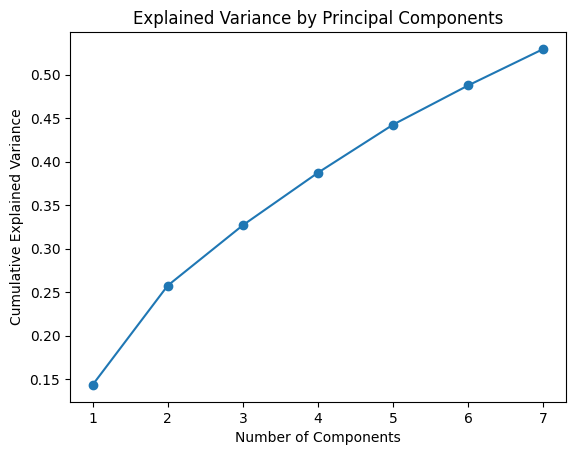

In [ ]:
explained_variance7 = pca7.explained_variance_ratio_
cumulative_explained_variance7 = explained_variance7.cumsum()
plt.plot(range(1, 8), cumulative_explained_variance7, marker='o')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

<font color='darkblue'>*The same with 9 components:</font>*

In [ ]:
pca9 = PCA(9)
pca9_components = pca9.fit_transform(standardized_data)
pca9_df = pd.DataFrame(data=pca9_components)
pca9_df

,0,1,2,3,4,5,6,7,8
0,-0.900205,-4.137431,0.209547,-2.726672,1.577911,-1.703111,4.053647,2.220330,1.473955
1,-1.996976,-3.589026,0.276674,-2.991540,0.950821,-0.910976,4.306556,2.320976,2.210943
2,-1.401386,-0.125545,-0.193346,-2.255143,1.724754,1.052925,0.148575,0.877954,-2.262758
3,1.299611,-3.184897,0.855712,-2.909096,-0.021763,-3.331565,4.514137,2.288783,0.220416
4,-0.314621,-4.054129,0.207190,-2.651576,2.070873,-2.595179,4.083431,2.119171,1.466140
...,...,...,...,...,...,...,...,...,...
1270,-1.084430,-0.784301,-0.031555,0.889582,-0.965252,-0.625143,-0.046251,-0.577507,-0.704471
1271,0.504773,-1.855886,0.151190,0.704378,-1.297142,-1.118378,0.203535,-0.230001,-1.342889
1272,-2.016892,-0.100890,-0.362692,0.783610,-0.612550,0.680374,-0.075461,-0.252287,-0.115045
1273,-0.726044,2.559323,-0.486062,1.752537,0.799753,-1.526706,-0.386914,2.572558,1.114959


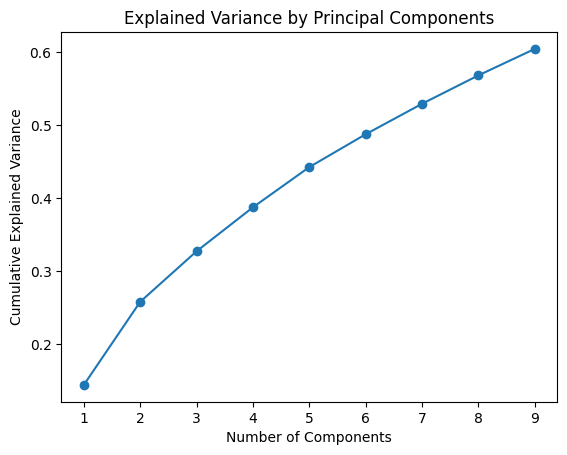

In [ ]:
explained_variance9 = pca9.explained_variance_ratio_
cumulative_explained_variance9 = explained_variance9.cumsum()
plt.plot(range(1, 10), cumulative_explained_variance9, marker='o')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

<font color='darkblue'>***- GLM model.</font>***

<font color='darkblue'>*</font>*

In [ ]:
for col in df.columns:
  if len(df[col].unique()) < 7:
    print(f"'{col}':  {len(df[col].unique())}")

'TypeName':  6
'CPU_Company':  3
'GPU_Company':  4
'Storage type':  4


In [ ]:
numeric_cols = df.select_dtypes(include=np.number).columns
categorical_cols = ['TypeName', 'CPU_Company', 'GPU_Company', 'Storage type']
selected_cols = list(numeric_cols) + categorical_cols
df_glm = df[selected_cols].copy()
df_glm

,Inches,CPU_Frequency (GHz),RAM (GB),Weight (kg),Price (Euro),TypeName,CPU_Company,GPU_Company,Storage type
0,13.3,2.3,8,1.37,1339.69,Ultrabook,Intel,Intel,SSD
1,13.3,1.8,8,1.34,898.94,Ultrabook,Intel,Intel,Flash Storage
2,15.6,2.5,8,1.86,575.00,Notebook,Intel,Intel,SSD
3,15.4,2.7,16,1.83,2537.45,Ultrabook,Intel,AMD,SSD
4,13.3,3.1,8,1.37,1803.60,Ultrabook,Intel,Intel,SSD
...,...,...,...,...,...,...,...,...,...
1270,14.0,2.5,4,1.80,638.00,2 in 1 Convertible,Intel,Intel,SSD
1271,13.3,2.5,16,1.30,1499.00,2 in 1 Convertible,Intel,Intel,SSD
1272,14.0,1.6,2,1.50,229.00,Notebook,Intel,Intel,Flash Storage
1273,15.6,2.5,6,2.19,764.00,Notebook,Intel,AMD,HDD


In [ ]:
df_glm.columns = df_glm.columns.str.replace(r'\s+', '_', regex=True)
df_glm.columns = df_glm.columns.str.replace(r'[()]', '', regex=True)
df_glm.columns

Index(['Inches', 'CPU_Frequency_GHz', 'RAM_GB', 'Weight_kg', 'Price_Euro',
       'TypeName', 'CPU_Company', 'GPU_Company', 'Storage_type'],
      dtype='object')

In [ ]:
glm_model1 = smf.glm(formula='Price_Euro ~ Inches + CPU_Frequency_GHz + RAM_GB + Weight_kg + TypeName + CPU_Company + GPU_Company + Storage_type',
                    data=df_glm,
                    family=sm.families.Gaussian())
glm_results1 = glm_model1.fit()
print(glm_results1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             Price_Euro   No. Observations:                 1275
Model:                            GLM   Df Residuals:                     1258
Model Family:                Gaussian   Df Model:                           16
Link Function:               Identity   Scale:                      1.4211e+05
Method:                          IRLS   Log-Likelihood:                -9364.1
Date:                Fri, 13 Dec 2024   Deviance:                   1.7878e+08
Time:                        15:12:45   Pearson chi2:                 1.79e+08
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9151
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [ ]:
glm_model2 = smf.glm(formula='Price_Euro ~ Inches + CPU_Frequency_GHz + RAM_GB + Weight_kg + TypeName + Storage_type',
                    data=df_glm,
                    family=sm.families.Gaussian())
glm_results2 = glm_model2.fit()
print(glm_results2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             Price_Euro   No. Observations:                 1275
Model:                            GLM   Df Residuals:                     1262
Model Family:                Gaussian   Df Model:                           12
Link Function:               Identity   Scale:                      1.4652e+05
Method:                          IRLS   Log-Likelihood:                -9385.6
Date:                Fri, 13 Dec 2024   Deviance:                   1.8490e+08
Time:                        15:14:20   Pearson chi2:                 1.85e+08
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9055
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 